# Filtering

Convolutional filters operate on groups of pixels in an image.  In this lab we will explore various filter operations such as blur and edge detection filters.

In [1]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
import skimage
from scipy.ndimage import convolve
import scipy

/tmp/ipykernel_2819/3454105921.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('love_and_peace.jpg')


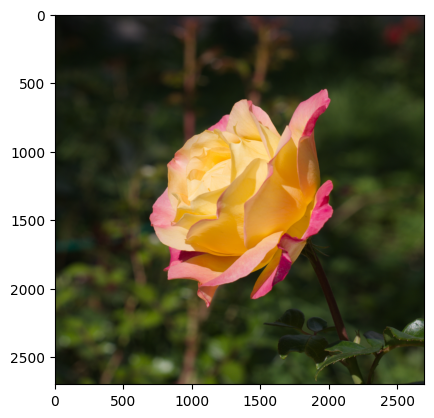

In [25]:
im = imageio.imread('love_and_peace.jpg')
plt.imshow(im)

/tmp/ipykernel_2819/2077426638.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('love_and_peace.jpg')


(2700, 2700)

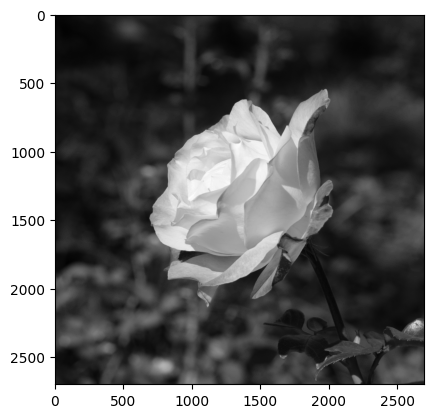

In [24]:
im = imageio.imread('love_and_peace.jpg')
im = skimage.color.rgb2gray(im)
plt.imshow(im,cmap='gray')

Let's make a classic 3x3 blur kernel: the Gaussian kernel.  

$\begin{bmatrix}
1 & 2 & 1\\
2 & 4 & 2\\
1 & 2 & 1
\end{bmatrix}/16$

We divide by 16 so that the kernel sums to one.  This ensures that we do not change the range of the data when we apply the kernel.

In [21]:
blur = np.array([[1,2,1],
                 [2,4,2],
                 [1,2,1]])/16



To apply the kernel, we use the `scipy.ndimage.convolve` function.  By default, this uses reflection padding.

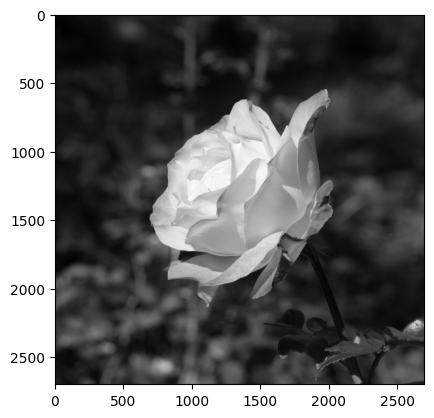

In [22]:
im_blur = convolve(im,blur)
plt.imshow(im_blur,cmap='gray')

Because the image is large, we can't readily see the effect of blurring.  Let's look at a close-up of the center of the image.

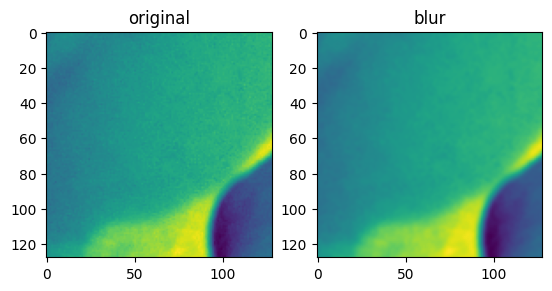

In [10]:
def get_center_crop(image,size=128):
    H,W = image.shape[:2]
    return image[H//2-size//2:H//2+size//2,W//2-size//2:W//2+size//2]

fig,axes = plt.subplots(1,2)
images = [im,im_blur]
titles = ['original','blur']
for ax,image,title in zip(axes,images,titles):
    ax.imshow(get_center_crop(image))
    ax.set_title(title)
plt.show()

We can construct larger Gaussian kernels as well, that will blur "more."  For this we use the `scipy.signal.windows.gaussian` function which makes a 1D Gaussian of a specified size and std. dev.

In [11]:
G = scipy.signal.windows.gaussian(51, std=7)
G

array([0.00169928, 0.00280164, 0.00452581, 0.00716336, 0.011109  ,
       0.01687988, 0.02513049, 0.03665804, 0.05239314, 0.07336965,
       0.1006689 , 0.13533528, 0.17826398, 0.2300663 , 0.29092381,
       0.36044779, 0.43756474, 0.52045012, 0.60653066, 0.69256932,
       0.77483743, 0.84936582, 0.91225408, 0.96000544, 0.9898478 ,
       1.        , 0.9898478 , 0.96000544, 0.91225408, 0.84936582,
       0.77483743, 0.69256932, 0.60653066, 0.52045012, 0.43756474,
       0.36044779, 0.29092381, 0.2300663 , 0.17826398, 0.13533528,
       0.1006689 , 0.07336965, 0.05239314, 0.03665804, 0.02513049,
       0.01687988, 0.011109  , 0.00716336, 0.00452581, 0.00280164,
       0.00169928])

An interesting property of a Gaussian is that we can form a 2D Gaussian by multiplying two 1D Gaussians together.  

First we use `None` to create a new axis to make a horizontal and a vertical Gaussian:

In [12]:
G_horiz = G[None,:]
G_horiz

array([[0.00169928, 0.00280164, 0.00452581, 0.00716336, 0.011109  ,
        0.01687988, 0.02513049, 0.03665804, 0.05239314, 0.07336965,
        0.1006689 , 0.13533528, 0.17826398, 0.2300663 , 0.29092381,
        0.36044779, 0.43756474, 0.52045012, 0.60653066, 0.69256932,
        0.77483743, 0.84936582, 0.91225408, 0.96000544, 0.9898478 ,
        1.        , 0.9898478 , 0.96000544, 0.91225408, 0.84936582,
        0.77483743, 0.69256932, 0.60653066, 0.52045012, 0.43756474,
        0.36044779, 0.29092381, 0.2300663 , 0.17826398, 0.13533528,
        0.1006689 , 0.07336965, 0.05239314, 0.03665804, 0.02513049,
        0.01687988, 0.011109  , 0.00716336, 0.00452581, 0.00280164,
        0.00169928]])

In [13]:
G_vert = G[:,None]
G_vert

array([[0.00169928],
       [0.00280164],
       [0.00452581],
       [0.00716336],
       [0.011109  ],
       [0.01687988],
       [0.02513049],
       [0.03665804],
       [0.05239314],
       [0.07336965],
       [0.1006689 ],
       [0.13533528],
       [0.17826398],
       [0.2300663 ],
       [0.29092381],
       [0.36044779],
       [0.43756474],
       [0.52045012],
       [0.60653066],
       [0.69256932],
       [0.77483743],
       [0.84936582],
       [0.91225408],
       [0.96000544],
       [0.9898478 ],
       [1.        ],
       [0.9898478 ],
       [0.96000544],
       [0.91225408],
       [0.84936582],
       [0.77483743],
       [0.69256932],
       [0.60653066],
       [0.52045012],
       [0.43756474],
       [0.36044779],
       [0.29092381],
       [0.2300663 ],
       [0.17826398],
       [0.13533528],
       [0.1006689 ],
       [0.07336965],
       [0.05239314],
       [0.03665804],
       [0.02513049],
       [0.01687988],
       [0.011109  ],
       [0.007

Now we combine them using the `@` operator which does matrix multiplication.

We are multiplying a $51 \times 1$ matrix with a $1 \times 51$ matrix, so the result will have shape $51 \times 51$.

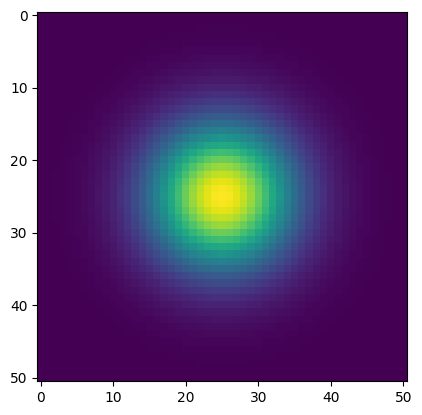

In [14]:
blur_more = G[:,None] @ G[None,:]
plt.imshow(blur_more)

In [15]:
im_blur_more = convolve(im,blur_more)

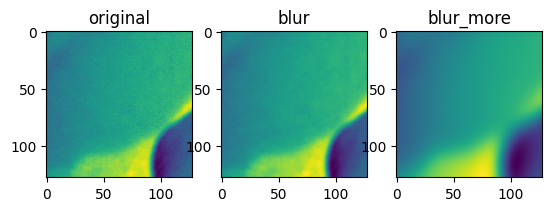

In [16]:
fig,axes = plt.subplots(1,3)
images = [im,im_blur,im_blur_more]
titles = ['original','blur','blur_more']
for ax,image,title in zip(axes,images,titles):
    ax.imshow(get_center_crop(image))
    ax.set_title(title)
plt.show()

## On NumPy slicing

NumPy provides a facility to skip rows and columns when slicing.  The full syntax is as follows:

    a[<start>:<end>:<skip>]

This will index the axis from `start` to `end` (exclusive), with a step size of `skip`.

If you don't specify `start`, it is assumed to be `0`, and if you don't specify `end`, it will go to the end of the axis.

Here are some examples:

In [17]:
a = np.array(
    [[1,2,3,4,5],
     [6,7,8,9,0],
     [1,2,3,4,5],
     [6,7,8,9,0]])
a

array([[1, 2, 3, 4, 5],
       [6, 7, 8, 9, 0],
       [1, 2, 3, 4, 5],
       [6, 7, 8, 9, 0]])

Take every other row:

In [18]:
a[::2]

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

Take every other column:

In [19]:
a[:,::2]

array([[1, 3, 5],
       [6, 8, 0],
       [1, 3, 5],
       [6, 8, 0]])

Take every other column, starting at the first column:

In [20]:
a[:,1::2]

array([[2, 4],
       [7, 9],
       [2, 4],
       [7, 9]])

Take every other row and column, starting at `(1,1)`:

In [92]:
a[1::2,1::2]

array([[7, 9],
       [7, 9]])

You can also store into a sliced array:

In [93]:
b = np.zeros((4,4))
b

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [94]:
b[1::2,1::2] = a[1::2,1::2]
b

array([[0., 0., 0., 0.],
       [0., 7., 0., 9.],
       [0., 0., 0., 0.],
       [0., 7., 0., 9.]])

## Image downsampling

Blurring and slicing come together when we want to downsample an image (reduce it size).

If we simply downsample by slicing, we see artifacts in the result due to an effect called "aliasing."

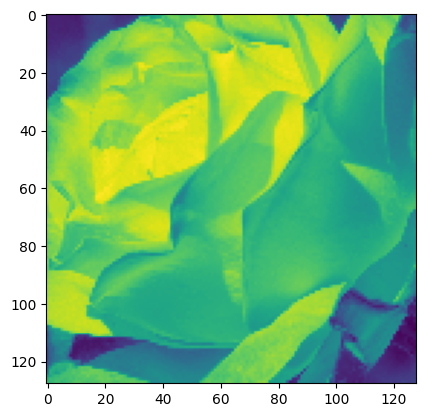

In [99]:
im_down = im[::8,::8]
plt.imshow(get_center_crop(im_down))

Note the "blockiness" on the edges of the flower in the bottom-right corner.

To address this issue, we can first blur, and then slice.

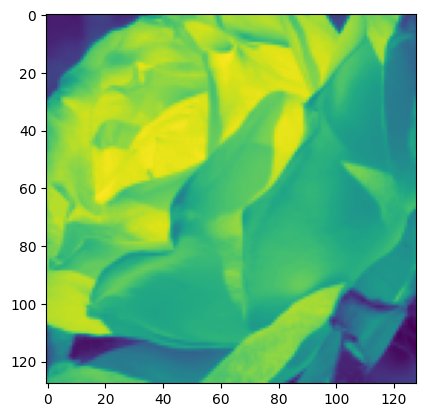

In [106]:
G = scipy.signal.windows.gaussian(21, std=3)
blur = G[:,None] @ G[None,:]
im_blur = convolve(im,blur)
im_blur_down = im_blur[::8,::8]
plt.imshow(get_center_crop(im_blur_down))